In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
# Read masses

box = 1
snapshot = 11

data_dir = f'/raid/nbody/baorsd/run1{box:02d}/halo_catalog/'

m200c = np.fromfile(data_dir + f'/S{snapshot:03d}_cen_rockstar_mass.bin',
                    dtype=np.float32)

In [58]:
len(m200c)

56070229

In [3]:
print(f'There are {len(m200c)} halos')

There are 56070229 halos


In [4]:
gals_filename = f'/raid/kobayashi/mock_2Gpc/Mcorr/R1{box:02d}_S{snapshot:03d}_rockstar_gal_2Gpc_Mcorr_nfwcm_wFoG'


In [18]:

m200c_parent_halo = np.fromfile(gals_filename + '_mass.bin',
                    dtype=np.float32)

gals_id = np.fromfile(gals_filename + '_CS.bin',
                     dtype = np.int32)

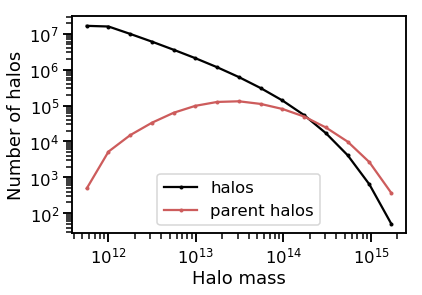

In [6]:

nbins= 15
bins = np.logspace(np.log10(np.min(m200c)),
            np.log10(np.max(m200c)), nbins+1)

mass_func, edges = np.histogram(m200c, bins=bins)
plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='black', marker='o',markersize=3,
           label='halos')

mass_func, edges = np.histogram(m200c_parent_halo, bins=bins)

plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='indianred', marker='o',markersize=3,
           label='parent halos')
plt.ylabel('Number of halos')
plt.xlabel('Halo mass')
plt.legend()

In [7]:
print(f'{np.min(m200c_parent_halo):.2E}')

5.76E+11


In [42]:
logM_min_parent = 13.9
logM_max_parent = 14.3

threshold_galaxies = (np.log10(m200c_parent_halo) > logM_min_parent) & \
                (np.log10(m200c_parent_halo) > logM_min_parent)

threshold_centrals = (np.log10(m200c) > logM_min_parent) & \
                (np.log10(m200c) > logM_min_parent)


In [44]:
n_centrals = m200c_parent_halo[(threshold_galaxies) & (gals_id == 1)].shape[0]
print('Central galaxies')
print(n_centrals)

n_sats = m200c_parent_halo[(threshold_galaxies) & (gals_id == 0)].shape[0] 
print('Satellite galaxies')
print(n_sats)

Central galaxies
111090
Satellite galaxies
35497


In [51]:
n_gals = n_centrals + n_sats

In [55]:
w_cc = n_centrals**2 / n_gals**2
print(w_cc)
w_cs = n_centrals * n_sats / n_gals**2
print(w_cs)
w_ss = n_sats**2/ n_gals**2
print(w_ss)

print(w_cc + 2*w_cs + w_ss)

0.5743267174023121
0.1835167475707073
0.05863978745627327
1.0


In [39]:
print('Central galaxies')
print(m200c_parent_halo[(threshold_galaxies) & (gals_id == 1)].shape[0])

print('Satellite galaxies')
print(m200c_parent_halo[(threshold_galaxies) & (gals_id == 0)].shape[0])

Central galaxies
344200
Satellite galaxies
37183


In [40]:
print('Central halos')

print(m200c[threshold_centrals].shape[0])


Central halos
975839


In [41]:
def vir_dispersion(M, Rvir):
    return np.sqrt(G * M / 2. /Rvir)